# Pip Install  

Pip install is a package that helps you install dependencies that does not come with Jupyter Notebook 

In [9]:
# pip install yellowbrick

If the package is already installed then pip will tell you.

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression

from yellowbrick.model_selection import *
from yellowbrick.classifier import *

from sklearn.model_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier 
from sklearn.metrics import *
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from google.cloud import bigquery


We can pull data from BigQuery and the data will return a dataframe for us in the name df

%% is a magic command you can use with your AI notebook in the Cloud.  

That way, you can run queries and extract data directly into Jupyter Notebook to do your work


In [120]:
# %%bigquery df

# SELECT *
# FROM `az-de-ui-fraud-analysis-prod.az_fraud_raw_100520.AZ_DataExtract_Google_All6_100520`

We can also run queries from BQML and import the results in a table 

# Save csv for use later

In [ ]:
# df.to_csv('cardio_set.csv',index=False)

# Load DataSet

In [153]:
df = pd.read_csv('cardio_train.csv',sep=';')

# Learns about the shape of the dataset

In [154]:
df.shape

(70000, 13)

In [155]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [157]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [158]:
df.tail(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


# Data Check

In [159]:
df.isnull().values.any()

False

In [160]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Coverting height from inches to feet

In [161]:
df['height'] = round(df['height'] / 12 , 2)

# Converting age from days to years

In [162]:
df['age'] = round(df['age'] / 365 , 2 )

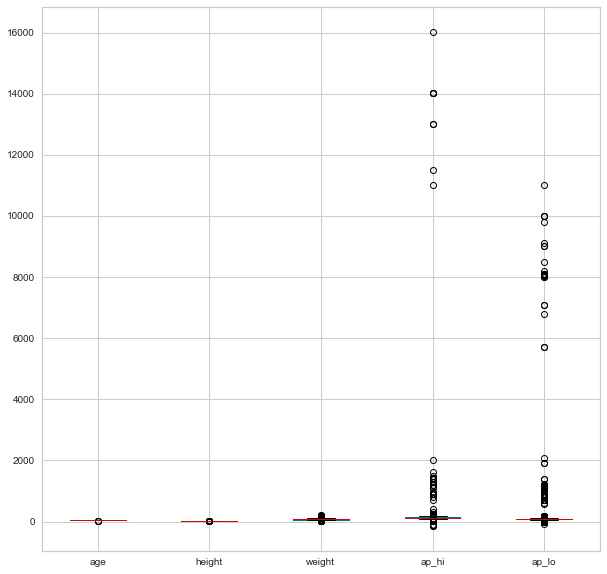

In [163]:
df[['age','height','weight','ap_hi','ap_lo']].boxplot(figsize=(10,10));

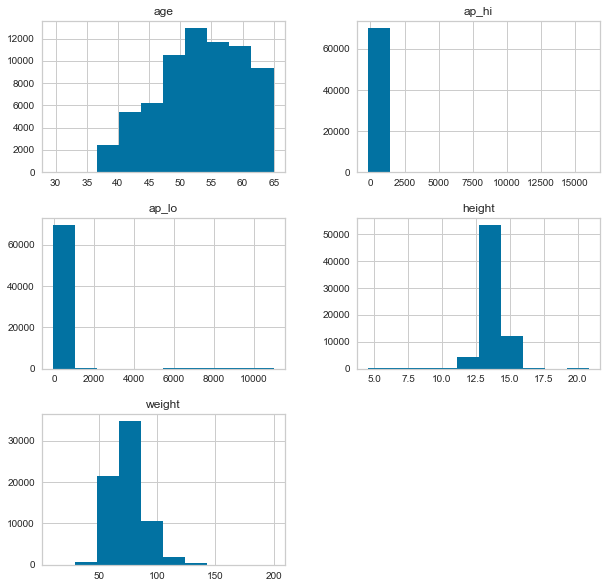

In [164]:
df[['age','height','weight','ap_hi','ap_lo']].hist(figsize=(10,10));

In [165]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003022,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022812,-0.081510,0.053682,0.020764,0.017647,0.154426,0.098703,-0.047632,-0.029724,-0.009925,0.238159
gender,0.003502,-0.022812,1.000000,0.499035,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003022,-0.081510,0.499035,1.000000,0.291037,0.005475,0.006163,-0.050175,-0.018595,0.187985,0.094427,-0.006533,-0.010814
weight,-0.001830,0.053682,0.155406,0.291037,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005475,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006163,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154426,-0.035821,-0.050175,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047632,0.338135,0.187985,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [131]:
X = df[['age' ,'gender','height', 'weight', 'ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']]

y = df['cardio']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [132]:
clf = LogisticRegression() 
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7190437270126686

In [133]:
clf = DecisionTreeClassifier() 
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.6281160604822231

In [144]:
clf = SVC() 
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7059664895790764

In [135]:
clf = RandomForestClassifier() 
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.6906416019615856

In [145]:
clf = GradientBoostingClassifier() 
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7268083367388639

# Classification Report

- breaks down by classes 

In [146]:
y_pred = clf.predict(X_test)
y_true = y_test

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      2410
           1       0.77      0.66      0.71      2484

    accuracy                           0.73      4894
   macro avg       0.73      0.73      0.73      4894
weighted avg       0.73      0.73      0.73      4894



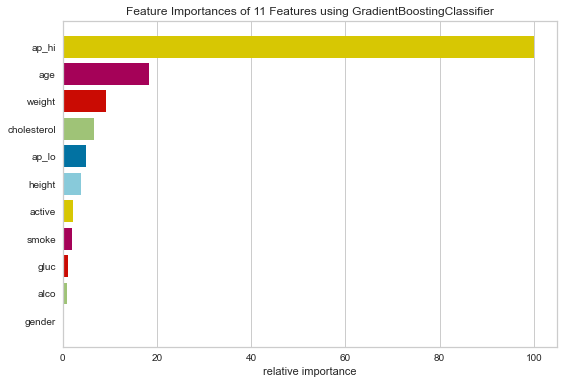

<AxesSubplot:title={'center':'Feature Importances of 11 Features using GradientBoostingClassifier'}, xlabel='relative importance'>

In [137]:
model = GradientBoostingClassifier()
viz = FeatureImportances(model)
viz.fit(X_test, y_test)
viz.show()

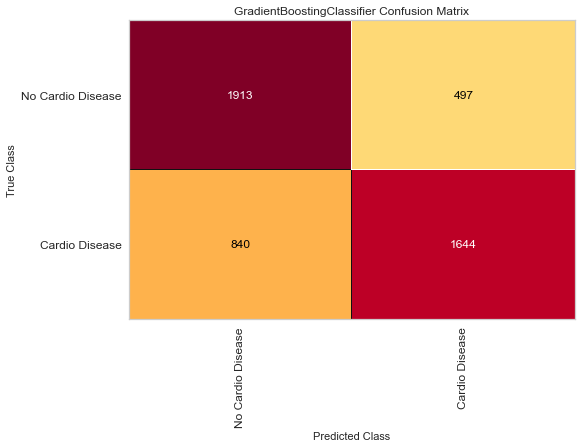

ConfusionMatrix(ax=<AxesSubplot:title={'center':'GradientBoostingClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=['No Cardio Disease', 'Cardio Disease'],
                cmap=<matplotlib.colors.ListedColormap object at 0x7fdd95b2bf50>,
                encoder=None, fontsize=None, force_model=False,
                is_fitted='auto', model=None, percent=False,
                sample_weight=None)

In [138]:
from yellowbrick.classifier import confusion_matrix

confusion_matrix(
    GradientBoostingClassifier(),
    X_train, y_train, X_test, y_test,
    classes=['No Cardio Disease','Cardio Disease'])

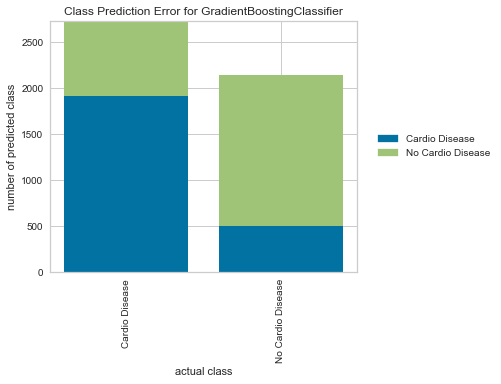

<AxesSubplot:title={'center':'Class Prediction Error for GradientBoostingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [139]:
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    GradientBoostingClassifier(), classes=['Cardio Disease','No Cardio Disease']
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

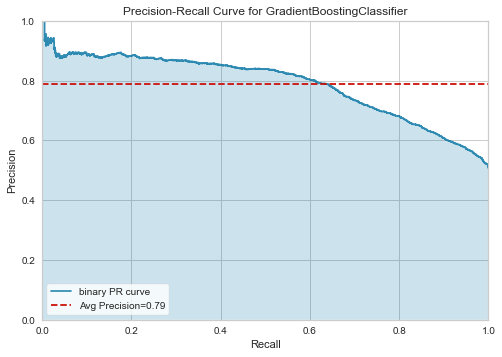

<AxesSubplot:title={'center':'Precision-Recall Curve for GradientBoostingClassifier'}, xlabel='Recall', ylabel='Precision'>

In [140]:
viz = PrecisionRecallCurve(GradientBoostingClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

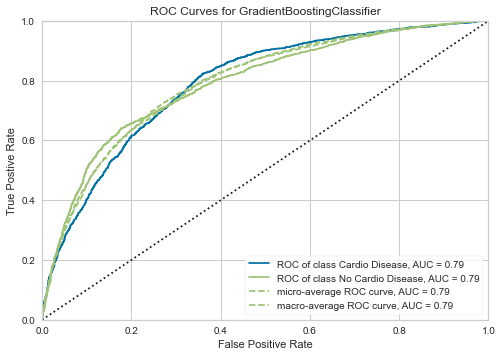

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [141]:
model = GradientBoostingClassifier()

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(model, classes=['Cardio Disease','No Cardio Disease'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

Despite Using Better Modeling Techniques, the results of the models did not improve a great deal.  This could be that the dataset itself is not that predictive and the classifying cardiovascular disease is a challenging problem.  A much more straightforward dataset is here: 

https://www.kaggle.com/ronitf/heart-disease-uci


# When to use which model

SVM - 


# Pushing Prediction results back into BigQuery Tables

In [ ]:
# table_id = 'az-de-ui-fraud-analysis-prod.Processed_DATA.fraud_results_4'

# client = bigquery.Client()
# # Since string columns use the "object" dtype, pass in a (partial) schema
# # to ensure the correct BigQuery data type.

# job = client.load_table_from_dataframe(
#     data_held, table_id
# )

# # Wait for the load job to complete.
# job.result()

# Note: 

On bigger jobs, you can adjust the CPU,add more memory, or even add a GPU for Tensorflow.  

# model Peristence 

- save the model and host it in GCP cloud